In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cd '/content/gdrive/MyDrive/CaTr'

In [ ]:
!cd '/content/gdrive/MyDrive/CaTr' && git clone 'https://github.com/saahiluppal/catr.git'

In [ ]:
!cd '/content/gdrive/MyDrive/CaTr/catr' && git pull 'https://github.com/saahiluppal/catr.git'

From https://github.com/saahiluppal/catr
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


In [ ]:
import torch
model = torch.hub.load('saahiluppal/catr', 'v3', pretrained=True) 

Downloading: "https://github.com/saahiluppal/catr/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

Downloading: "https://github.com/saahiluppal/catr/releases/download/0.2/weight493084032.pth" to /root/.cache/torch/hub/checkpoints/weight493084032.pth


  0%|          | 0.00/322M [00:00<?, ?B/s]

In [ ]:
!pip install -r '/content/gdrive/MyDrive/CaTr/catr/requirements.txt'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 8.5 MB/s 
     |████████████████████████████████| 6.6 MB 50.7 MB/s 
     |████████████████████████████████| 101 kB 9.0 MB/s 
     |████████████████████████████████| 596 kB 70.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!mkdir 'trainingImages'

In [ ]:
!cd '/content/trainingImages' && jar xvf '/content/gdrive/MyDrive/BLtraining.zip' 

Streaming output truncated to the last 5000 lines.
 inflated: BLtraining/309.png
 inflated: BLtraining/3090.png
 inflated: BLtraining/3091.png
 inflated: BLtraining/3092.png
 inflated: BLtraining/3093.png
 inflated: BLtraining/3094.png
 inflated: BLtraining/3095.png
 inflated: BLtraining/3096.png
 inflated: BLtraining/3097.png
 inflated: BLtraining/3098.png
 inflated: BLtraining/3099.png
 inflated: BLtraining/31.png
 inflated: BLtraining/310.png
 inflated: BLtraining/3100.png
 inflated: BLtraining/3101.png
 inflated: BLtraining/3102.png
 inflated: BLtraining/3103.png
 inflated: BLtraining/3104.png
 inflated: BLtraining/3105.png
 inflated: BLtraining/3106.png
 inflated: BLtraining/3107.png
 inflated: BLtraining/3108.png
 inflated: BLtraining/3109.png
 inflated: BLtraining/311.png
 inflated: BLtraining/3110.png
 inflated: BLtraining/3111.png
 inflated: BLtraining/3112.png
 inflated: BLtraining/3113.png
 inflated: BLtraining/3114.png
 inflated: BLtraining/3115.png
 inflated: BLtraining/31

In [ ]:
!mkdir 'validationImages'

In [ ]:
!cd '/content/validationImages' && jar xvf '/content/gdrive/MyDrive/BLvalidation.zip' 

 inflated: BLvalidation/7324.png
 inflated: BLvalidation/7325.png
 inflated: BLvalidation/7326.png
 inflated: BLvalidation/7327.png
 inflated: BLvalidation/7328.png
 inflated: BLvalidation/7329.png
 inflated: BLvalidation/7330.png
 inflated: BLvalidation/7331.png
 inflated: BLvalidation/7332.png
 inflated: BLvalidation/7333.png
 inflated: BLvalidation/7334.png
 inflated: BLvalidation/7335.png
 inflated: BLvalidation/7336.png
 inflated: BLvalidation/7337.png
 inflated: BLvalidation/7338.png
 inflated: BLvalidation/7339.png
 inflated: BLvalidation/7340.png
 inflated: BLvalidation/7341.png
 inflated: BLvalidation/7342.png
 inflated: BLvalidation/7343.png
 inflated: BLvalidation/7344.png
 inflated: BLvalidation/7345.png
 inflated: BLvalidation/7346.png
 inflated: BLvalidation/7347.png
 inflated: BLvalidation/7348.png
 inflated: BLvalidation/7349.png
 inflated: BLvalidation/7350.png
 inflated: BLvalidation/7351.png
 inflated: BLvalidation/7352.png
 inflated: BLvalidation/7353.png
 inflated:

In [ ]:
import tensorflow.keras.applications.xception
import tensorflow.keras.preprocessing.image

In [ ]:
!mkdir 'preprocessedTraining'
!mkdir 'preprocessedValidation'

In [ ]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ds_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_ds = ds_gen.flow_from_directory(
  "/content/trainingImages", 
  shuffle=False,
  target_size=(299, 299),
  batch_size=32
)
x,y=train_ds.next()

val_ds = ds_gen.flow_from_directory(
  "/content/validationImages",
  shuffle=False,
  target_size=(299, 299),
  batch_size=32
)
x1,y1=val_ds.next()

Found 7323 images belonging to 1 classes.
Found 1831 images belonging to 1 classes.


In [ ]:
import json
  
# Opening JSON file
f = open('/content/gdrive/MyDrive/captions.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(data, test_size = 0.2, shuffle=False )

In [ ]:
trainJson = open('captions_train.json', 'w')
trainJson.write(str(train))
trainJson.close()

In [ ]:
valJson = open('captions_validation.json', 'w')
valJson.write(str(val))
valJson.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


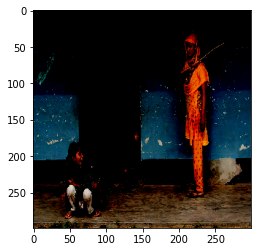

In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

pyplot.plot()
pyplot.imshow(train_ds[0][0][0], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
!cd '/content/gdrive/MyDrive/CaTr/catr/' && python main.py

Initializing Device: cuda
Number of params: 83959866
Train: 7322
Valid: 1831
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Start Training..
Epoch: 0
  0% 0/228 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`)